### K-Means 알고리즘
+ 원리가 단순하고 직관적이며, 성능이 좋은 군집화 알고리즘이다.
+ 데이터 분포에 대한 사전지식이 없을 경우에도 사용가능하지만,  
사전에 군집의 개수(k)를 지정해야하는 단점이 있다.

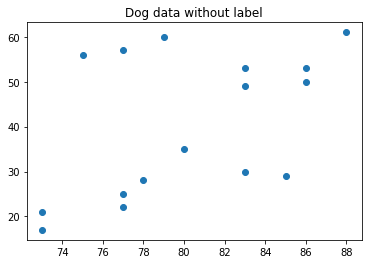

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dach_length = [77, 78, 85, 83, 73, 77, 73, 80]
dach_height = [25, 28, 29, 30, 21, 22, 17, 35]
samo_length = [75, 77, 86, 86, 79, 83, 83, 88]
samo_height = [56, 57, 50, 53, 60, 53, 49, 61]

length = np.array(dach_length + samo_length)   #(16, )
height = np.array(dach_height + samo_height)   #(16, )

plt.title('Dog data without label')
plt.scatter(length, height);   #라벨에 대한 사전정보 없음

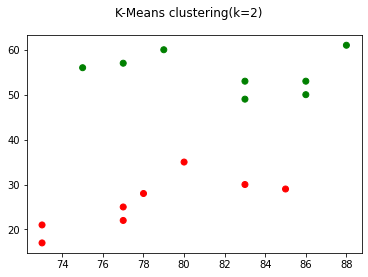

In [2]:
from sklearn.cluster import KMeans

data = np.column_stack((length, height))       #(16, 2)

def kmeans_pred_plot(X, k):
    model = KMeans(n_clusters=k)
    model.fit(X)
    y_pred = model.predict(X)   #0~k-1 사이 라벨 예측
    colors = np.array(['r', 'g', 'b', 'magenta'])
    plt.suptitle(f'K-Means clustering(k={k})')
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred]);
    
kmeans_pred_plot(data,k=2)

#### Iris 데이터 군집화
k-means 알고리즘을 사용해 iris 데이터를 3개의 군집으로 나누어보고,  
결과와 원래 iris.target을 비교해 정확도를 출력해보자.

In [3]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

iris = load_iris()

data = iris.data
target = iris.target
k = len(iris.target_names)

print(f'K-Means clustering(k={k})')
model = KMeans(n_clusters=k)
model.fit(data)
y_pred = model.predict(data)

y_pred

K-Means clustering(k=3)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [4]:
label_0 = np.bincount(y_pred[:50])
label_1 = np.bincount(y_pred[50:100])
label_2 = np.bincount(y_pred[100:])

label_0, label_1, label_2

(array([ 0, 50], dtype=int64),
 array([48,  0,  2], dtype=int64),
 array([14,  0, 36], dtype=int64))

In [5]:
labels = {0:np.argmax(label_0),
          1:np.argmax(label_1),
          2:np.argmax(label_2)}

labels   #예측 군집이 0 => 실제 라벨 1, ...

{0: 1, 1: 0, 2: 2}

In [6]:
new_y_pred = []
for i in y_pred:
    new_y_pred.append(labels[i])
    
new_y_pred = np.array(new_y_pred)
new_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [7]:
accuracy_score(iris.target, new_y_pred)

0.8933333333333333

### Quiz.
+ 동물병원에서 치료받은 개의 종류와 크기 데이터를 바탕으로 K-NN 알고리즘을 적용해보자  
1. 데이터를 라벨링하여 데이터와 레이블을 각각 생성하고, 각 견종별 데이터를 2차원 배열로 출력해라.

In [8]:
dach_length = [75, 77, 83, 81, 73, 99, 72, 83]
dach_height = [24, 29, 19, 32, 21, 22, 19, 34]
samo_length = [76, 78, 82, 88, 76, 83, 81, 89]
samo_height = [55, 58, 53, 54, 61, 52, 57, 64]
malt_length = [35, 39, 38, 41, 30, 57, 41, 35]
malt_height = [23, 26, 19, 30, 21, 24, 28, 20]

dach = np.column_stack((dach_length, dach_height))
samo = np.column_stack((samo_length, samo_height))
malt = np.column_stack((malt_length, malt_height))

dach_label = np.zeros(8) 
samo_label = np.ones(8)
malt_label = np.ones(8) + 1

print(f'닥스훈트(0) : {[list(i) for i in list(dach)]}')
print(f'사모예드(1) : {[list(i) for i in list(samo)]}')
print(f'말티즈(2) : {[list(i) for i in list(malt)]}')

닥스훈트(0) : [[75, 24], [77, 29], [83, 19], [81, 32], [73, 21], [99, 22], [72, 19], [83, 34]]
사모예드(1) : [[76, 55], [78, 58], [82, 53], [88, 54], [76, 61], [83, 52], [81, 57], [89, 64]]
말티즈(2) : [[35, 23], [39, 26], [38, 19], [41, 30], [30, 21], [57, 24], [41, 28], [35, 20]]


2. k=3일 때 K-NN 분류기의 분류결과 목표값과 예측결과를 혼동행렬로 표시해라.

In [9]:
np.stack

<function numpy.stack(arrays, axis=0, out=None)>

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

data = np.row_stack((dach, samo, malt))                       #(24, 2)
label = np.concatenate((dach_label, samo_label, malt_label))    #(24, )

k = 3

model = KNeighborsClassifier(n_neighbors=k)
model.fit(data, label)
y_pred = model.predict(data)

confusion_matrix(label, y_pred)

array([[8, 0, 0],
       [0, 8, 0],
       [1, 0, 7]], dtype=int64)

3. 데이터 A, B, C, D에 대하여 각각 n_neighbors를 3, 5, 7로 하여 분류결과를 출력해라.

In [14]:
A = [[58, 30]]
B = [[80, 26]]
C = [[80, 41]]
D  =[[75, 55]]

dog_class = {0:'닥스훈트',
             1:'사모예드',
             2:'말티즈'}

n_neighbors = [3, 5, 7]
new_data = [('A',A), ('B',B), ('C',C), ('D',D)]
for dog in new_data:
    print(f'{dog[0]} 데이터 분류결과')
    for n in n_neighbors:
        model = KNeighborsClassifier(n_neighbors=n)
        model.fit(data, label)
        pred = model.predict(dog[1])
        print(f'{dog[0]} {dog[1]} : n_neighbors가 {n}일 때 : {dog_class[list(pred)[0]]}')
    print('-' * 50)

A 데이터 분류결과
A [[58, 30]] : n_neighbors가 3일 때 : 말티즈
A [[58, 30]] : n_neighbors가 5일 때 : 말티즈
A [[58, 30]] : n_neighbors가 7일 때 : 닥스훈트
--------------------------------------------------
B 데이터 분류결과
B [[80, 26]] : n_neighbors가 3일 때 : 닥스훈트
B [[80, 26]] : n_neighbors가 5일 때 : 닥스훈트
B [[80, 26]] : n_neighbors가 7일 때 : 닥스훈트
--------------------------------------------------
C 데이터 분류결과
C [[80, 41]] : n_neighbors가 3일 때 : 닥스훈트
C [[80, 41]] : n_neighbors가 5일 때 : 닥스훈트
C [[80, 41]] : n_neighbors가 7일 때 : 사모예드
--------------------------------------------------
D 데이터 분류결과
D [[75, 55]] : n_neighbors가 3일 때 : 사모예드
D [[75, 55]] : n_neighbors가 5일 때 : 사모예드
D [[75, 55]] : n_neighbors가 7일 때 : 사모예드
--------------------------------------------------


4. 3의 결과로 보아 위의 데이터 중에서 k값의 영향을 받지 않는 데이터는 무엇이며, 그 이유는 무엇인지 서술해라.
5. 3번 데이터를 산포도 그래프로 그려보아라. 
+ B, D 데이터는 k값의 영향을 받지 않는다.
+ 아래의 산점도를 보면 B, D는 각각 닥스훈트, 사모예드 군집에 매우 가깝지만,  
A, C는 두가지 군집 사이에 위치한 것을 볼 수 있다.

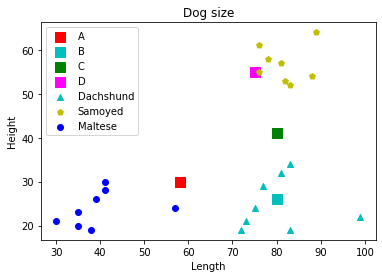

In [36]:
new_dots = A + B + C + D

plt.title('Dog size')
plt.xlabel('Length')
plt.ylabel('Height')
plt.scatter(A[0][0], A[0][1], c='r', marker='s', s=100, label='A')
plt.scatter(B[0][0], B[0][1], c='c', marker='s', s=100, label='B')
plt.scatter(C[0][0], C[0][1], c='g', marker='s', s=100, label='C')
plt.scatter(D[0][0], D[0][1], c='magenta', marker='s', s=100, label='D')
plt.scatter(dach_length, dach_height, c='c', marker='^', label='Dachshund')
plt.scatter(samo_length, samo_height, c='y', marker='p', label='Samoyed')
plt.scatter(malt_length, malt_height, c='b', label='Maltese')
plt.legend();